## Setup


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Create the training data.

In [3]:
nx = 11
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_increase'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

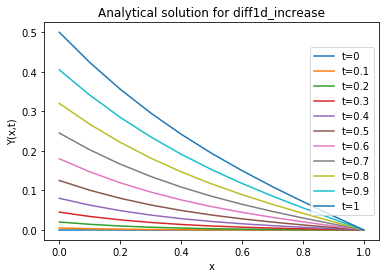

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 948
         Function evaluations: 1018
         Gradient evaluations: 1018
3min 9s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.010638461536275e-05
 hess_inv: array([[  7418.47956743,   1177.95696101, -13095.9341733 , ...,
         -7457.78690149,  -5339.61570299,   6029.04477237],
       [  1177.95695834,  23826.13839929,  -9222.13664341, ...,
         -2887.74043597,   -650.05550563,   3433.57247237],
       [-13095.93417304,  -9222.13664898, 162520.88373909, ...,
         22911.51395102,  13892.3108404 , -13335.31006337],
       ...,
       [ -7457.78690169,  -2887.74043912,  22911.51395087, ...,
         15351.39110599,   5815.3503584 , -10154.07588728],
       [ -5339.61570286,   -650.05550757,  13892.31084043, ...,
          5815.35035818,   4249.42600536,  -4727.0795842 ],
       [  6029.04477186,   3433.57247473, -13335.3100624 , ...,
        -10154.075

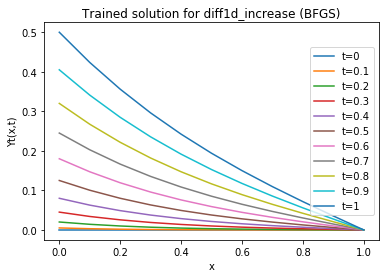

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

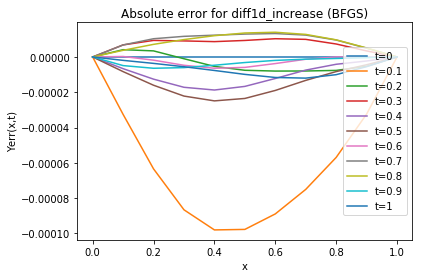

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


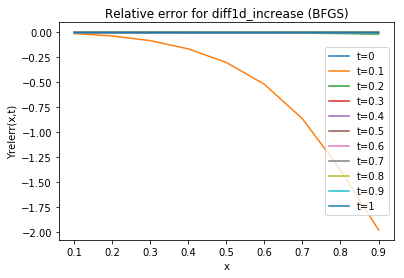

In [9]:
Yrelerr1 = (Yt1[:, 1:-1] - Ya[:, 1:-1])/Ya[:, 1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [10]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 2669
         Function evaluations: 2862
         Gradient evaluations: 2862
8min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 4.86112774385293e-06
 hess_inv: array([[ 90906.67823463, -14161.47873546, -56794.67623921, ...,
         -2154.81208864,   3874.16825406,   4036.46861223],
       [-14161.47870159, 183616.16433487,  -7171.51025907, ...,
         24200.25437   ,   6141.8140076 ,  18704.85849095],
       [-56794.67625565,  -7171.51029505, 120156.53354573, ...,
        -25307.36055844,   1492.86052332, -28635.46282886],
       ...,
       [ -2154.81201529,  24200.25447142, -25307.36065143, ...,
        188393.70318071,  25179.27864433,  44551.47039717],
       [  3874.16826699,   6141.81400717,   1492.86052035, ...,
         25179.27864078,   6010.49721596,  10482.65924165],
       [  4036.46868679,  18704.85845468, -28635.46286919, ...,
         44551.47

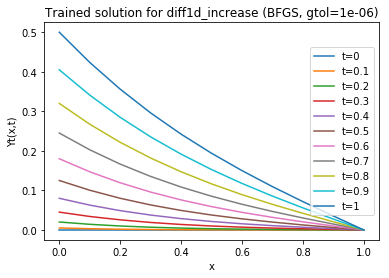

In [11]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

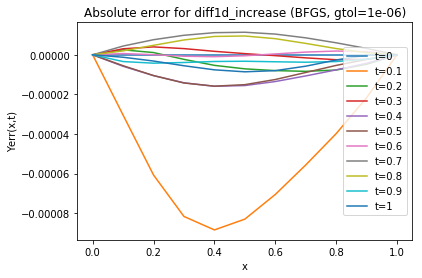

In [12]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


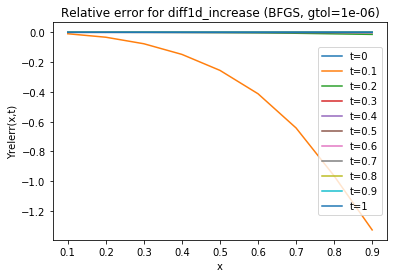

In [13]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8)

In [14]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

         Current function value: 0.000008
         Iterations: 8000
         Function evaluations: 8591
         Gradient evaluations: 8591
27min 21s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 7.94676791544551e-06
 hess_inv: array([[ 1.83332287e+04,  8.74615625e+03,  1.15242860e+04, ...,
         1.81587322e+04,  2.37817778e+03,  5.64906840e+01],
       [ 8.74615590e+03,  2.65844866e+04,  4.50326908e+03, ...,
         1.71719638e+04,  8.76451685e+03,  1.20614544e+02],
       [ 1.15242852e+04,  4.50326901e+03,  8.68420521e+03, ...,
         6.21709269e+03,  3.54192518e+03,  1.11488242e+02],
       ...,
       [ 1.81587315e+04,  1.71719577e+04,  6.21709661e+03, ...,
         6.26217199e+04, -8.79907365e+03,  2.08113194e+02],
       [ 2.37818651e+03,  8.76452418e+03,  3.54192854e+03, ...,
        -8.79907052e+03,  6.63613718e+04,  3.26296446e+01],
       [ 5.64905261e+01,  1.20614400e+02,  1.11487995e+02, ...,
         2.08112783e+02,  3.26292574e+01,  1.14724632e

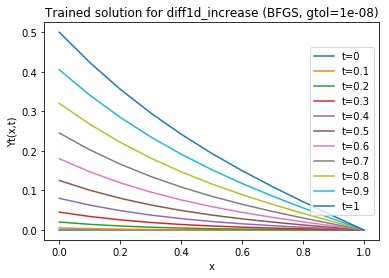

In [15]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

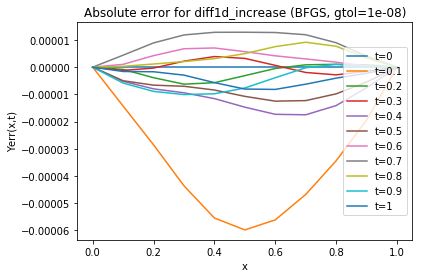

In [16]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


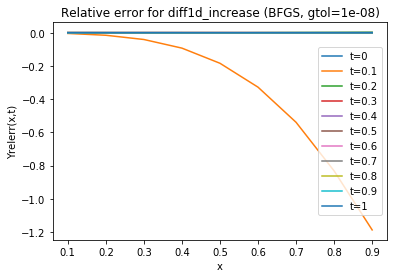

In [17]:
Yrelerr3 = (Yt3[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8, maxiter=16000)

In [18]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

         Current function value: 0.000001
         Iterations: 16000
         Function evaluations: 17236
         Gradient evaluations: 17236
51min 7s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 5.301443854895811e-07
 hess_inv: array([[  33163.71069758,   70212.70836761,  -36876.67488134, ...,
         120425.07602242,   -9284.38485347,   22292.42809208],
       [  70212.72290617,  720155.67248677,  -59370.15156627, ...,
         602137.29075917,  -51105.78856473,  -13015.54518565],
       [ -36876.66772537,  -59370.13613265,  134144.67874769, ...,
           6733.34445309,    9322.94027724,  -59064.50016677],
       ...,
       [ 120425.23812984,  602137.48370258,    6733.1215575 , ...,
        3924377.15222604,  -25488.39737605, -534203.22557621],
       [  -9284.38657074,  -51105.77945373,    9322.93848899, ...,
         -25488.35824181,    6336.23192433,   -7287.28352981],
       [  22292.40004631,  -13015.58897684,  -59064.46923231, ...,
        -534203.37

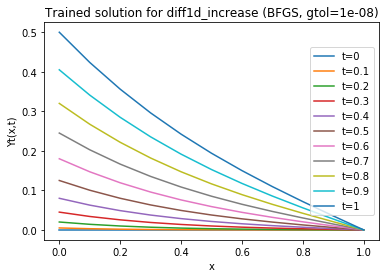

In [19]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

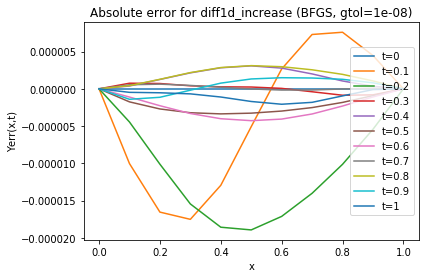

In [20]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


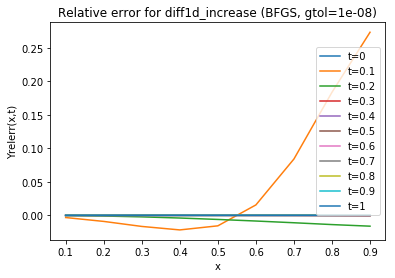

In [21]:
Yrelerr4 = (Yt4[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8, maxiter=32000)

In [22]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 32000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

         Current function value: 0.000000
         Iterations: 27005
         Function evaluations: 29336
         Gradient evaluations: 29324
1h 35min 37s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 4.597422945866166e-07
 hess_inv: array([[ 5.87265138e+04, -2.83015428e+04, -3.83400527e+04, ...,
         3.46492710e+07, -2.13884006e+04, -6.04689070e+06],
       [-2.77055919e+04,  1.41328807e+06,  4.70536354e+04, ...,
        -6.28976685e+07,  4.29852589e+04,  1.18014323e+07],
       [-3.82192741e+04,  4.83556309e+04,  8.83630123e+04, ...,
        -3.74268768e+07,  1.32189766e+04,  6.63225027e+06],
       ...,
       [ 3.45999495e+07, -6.24094295e+07, -3.73774388e+07, ...,
         3.42126316e+10, -2.02378088e+07, -6.05034515e+09],
       [-2.17502262e+04,  4.12994356e+04,  1.35586836e+04, ...,
        -2.02814589e+07,  5.86574474e+04,  3.59930338e+06],
       [-6.03806029e+06,  1.17120918e+07,  6.62270915e+06, ...,
        -6.05034187e+09,  3.59386419e+06,  1.07

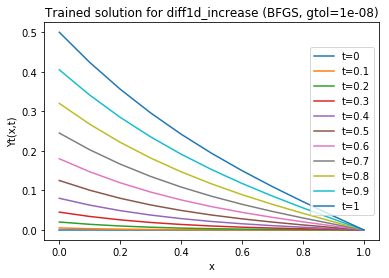

In [23]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

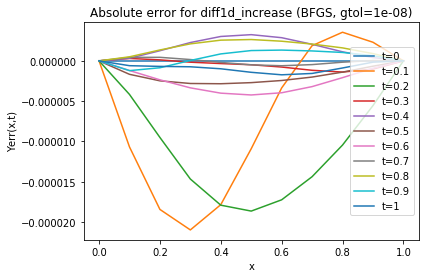

In [24]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

/Users/ewinter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


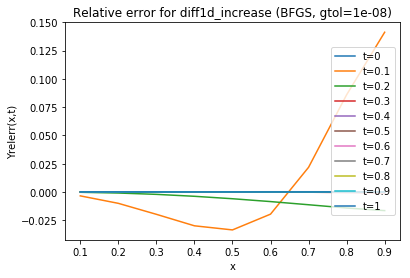

In [25]:
Yrelerr5 = (Yt5[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));